# Challenge
The whole challenge can be run from this notebook. An object-oriented structure was implemented. The algorithms that are used to complete the challenge are located inside the datatools folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from datatools import ECG_Manager, utils
import warnings

warnings.filterwarnings("ignore")

## Constant variables

In [2]:
DATA_PATH = "./data/"
sampling_rate = 100 # Either 100 or 500 Hz

## Load annotations of the dataset

First, we load the annotations file. The same methods as the example from the physionet dataset are being used (placed under utils.py). However, a new argument (num_epochs) is added to avoid loading the whole dataset every time.

In [3]:
# load and convert annotation data
Y = utils.get_annotations(DATA_PATH, num_epochs = 20)

## Instantiate an ECG_Manager object

All the processing is coded in the ECG_Manager class. First we instantiate an object of this class, for its later use in plotting and feature extraction. See ECG_Manager.py for further information.

In [4]:
# Load raw signal data
ECG = ECG_Manager.ECG_Manager(Y, DATA_PATH, sampling_rate)

## Plot data for doctor

The plotting function plot_epoch() accepts as arguments (I) the number of the epoch to be plotted, (II) the channels that will be plotted from that epoch in list/integer, (III) if the baseline should be removed in case that it was annotated that the epoch contains a baseline drift, (IV) an additional argument (not included in the below cell) to correct the baseline independently of the detection of a baseline_drift.

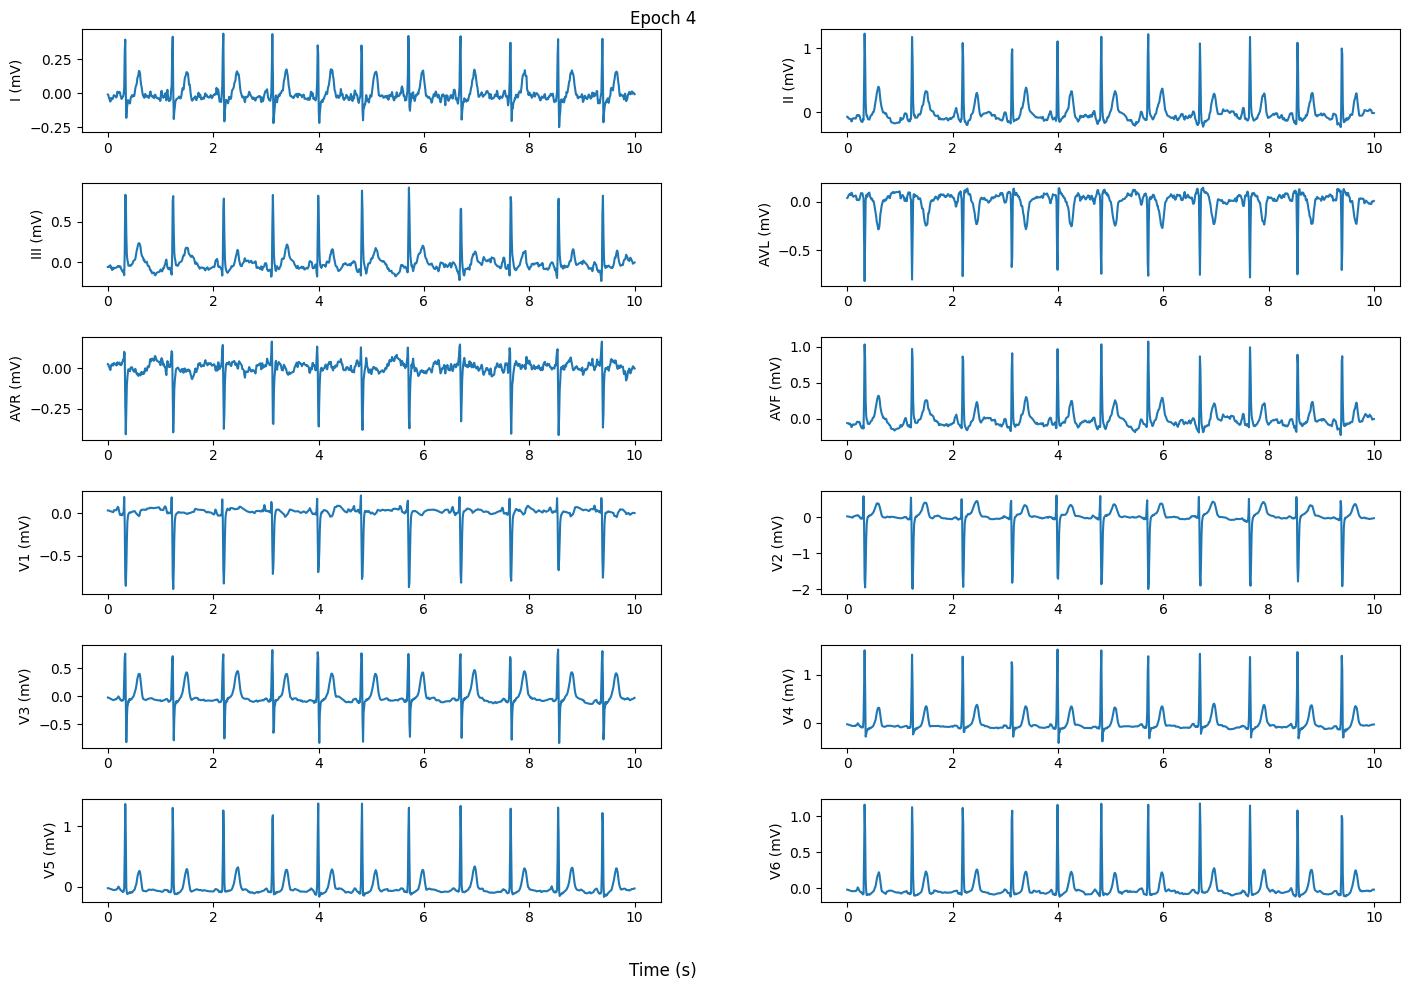

In [5]:
next_ecg = random.randrange(Y.shape[0]) # Get a random epoch
ECG.plot_epoch(next_ecg, "all", baseline_correction = True)

## Heart beats, heart rate and total heart beats

First, R peaks are detected by the compute_peaks method. The R peaks are used then in the computation of total heart beats (the counting of R peaks) and the heart rate (the inverse of the median RR interval). See the methods in ECG_Manager for a deeper explaination on how these algorithms work.

All features are being annotated into additional columns in the notes variable inside ECG_Manager.

Plotting epoch 13
Total heart beats: 12
Heart rate: 75.94936708860762 bpm


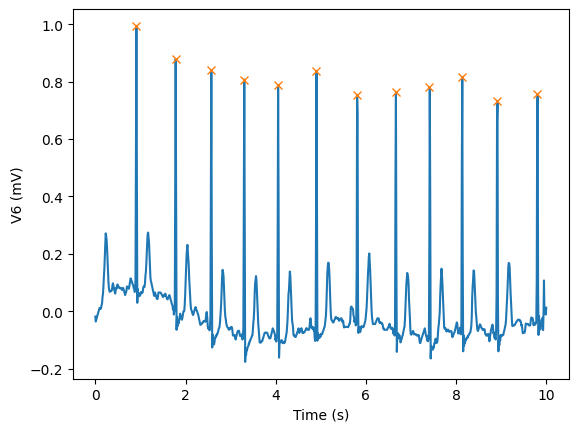

In [6]:
next_ecg = random.randrange(Y.shape[0]) # Get random epoch
next_channel = random.randrange(12) # Get random channel

# Plot the channel from the epoch
print("Plotting epoch " + str(next_ecg))
ECG.plot_epoch(next_ecg, [next_channel], baseline_correction = False)

# Mark the detected QRS complexes
peaks = ECG.compute_peaks(next_ecg)
plt.plot(peaks/sampling_rate, ECG.data[next_ecg, peaks,next_channel], "x")

# Print extracted features
print("Total heart beats: " + str(ECG.compute_thb(next_ecg)))
print("Heart rate: " + str(ECG.compute_hr(next_ecg)) + " bpm")